# Baseball Case Study

Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data

data=pd.read_csv("baseball.csv")

In [3]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


since it is of continous variable. we will be using Regression model to train and test data

we can't see  any null values here. we will confirm it 

In [4]:
data.shape

(30, 17)

There are 30 rows and 17 columns

In [5]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

The definition for each column name is described in problem statement above. Almost all the data are of int type and Earned Run Average (ERA) is of float type

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


The information on each column is shown

In [7]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Missing values

In [8]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No missing values found. We can see in heatmap for better visualization

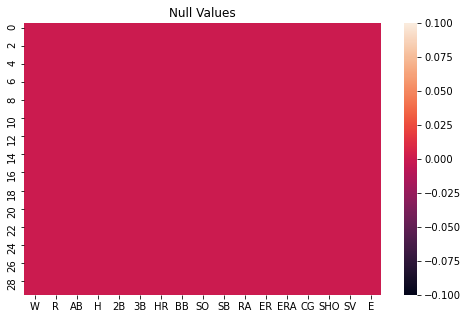

In [9]:
# heatmap on null values
plt.figure(figsize=[8,5])
sns.heatmap(data.isnull())
plt.title("Null Values")
plt.show()

There are no missing values in the dataset

# Statistics summary

In [10]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Representing data more visually and making observation

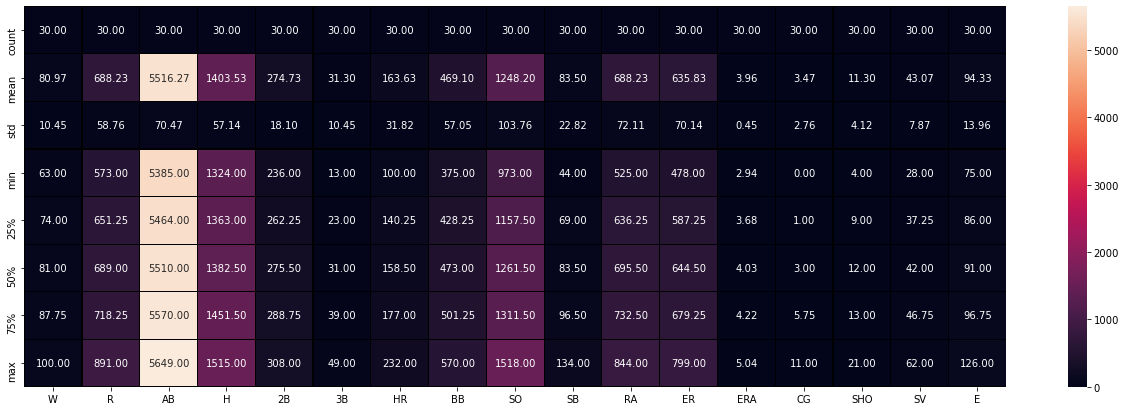

In [11]:
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

we can also have a more clear understanding of datum in each column from the heatmap above

# Analyzing Output data

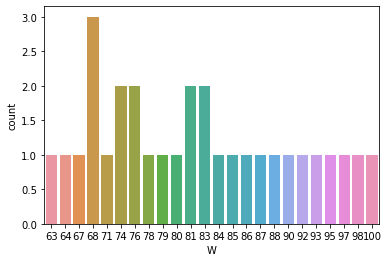

In [12]:
sns.countplot(x=data.W)

The number of wins ranges from 63 to 100 wins. 3 teams has 68 wins. 2 teams has 74 wins. 2 teams has 76 wins. 2 teams has 81 wins. 2 teams has 83 wins. we can analyze the datum further

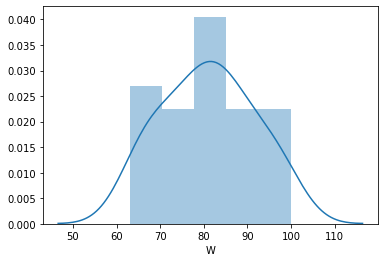

In [13]:
sns.distplot(data.W)

It is a normal distribution data 

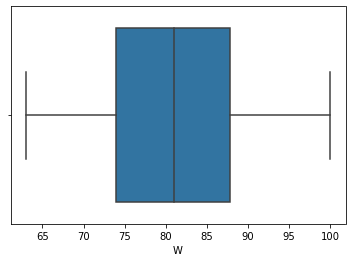

In [14]:
sns.boxplot(data.W)

There are no outliers in the output column. The minimum value is 63 and maximum value is 100.

# Correlation Check

In [15]:
datacor=data.corr()

In [16]:
datacor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


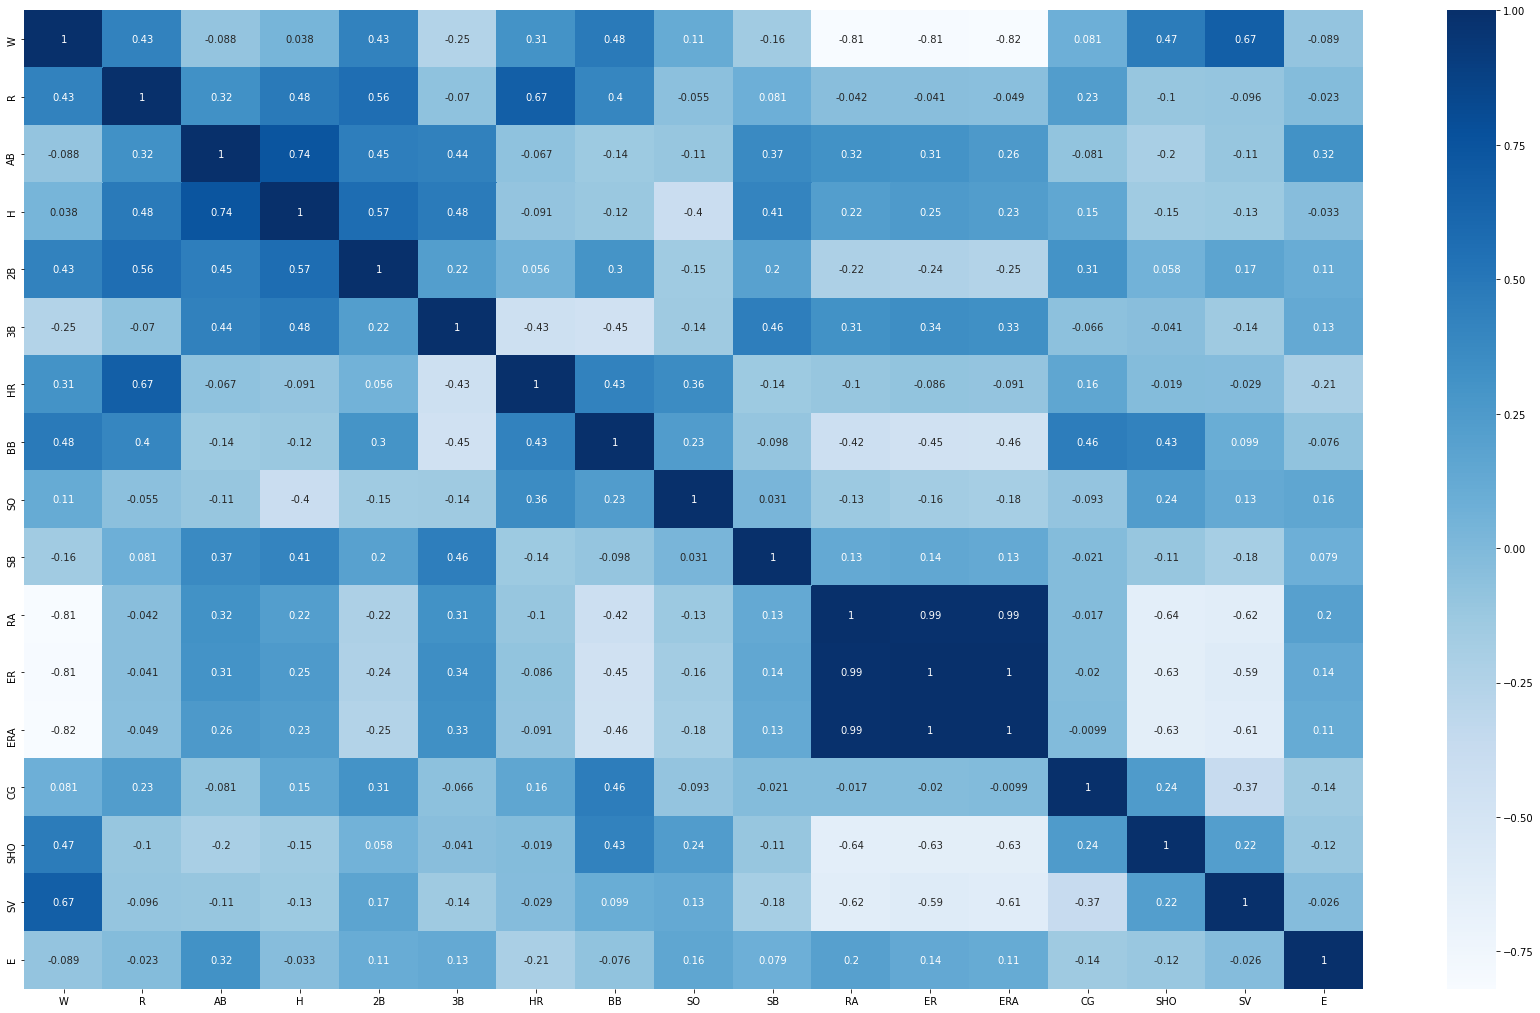

In [17]:
plt.figure(figsize=(30,18))
sns.heatmap(datacor,cmap='Blues',annot=True)

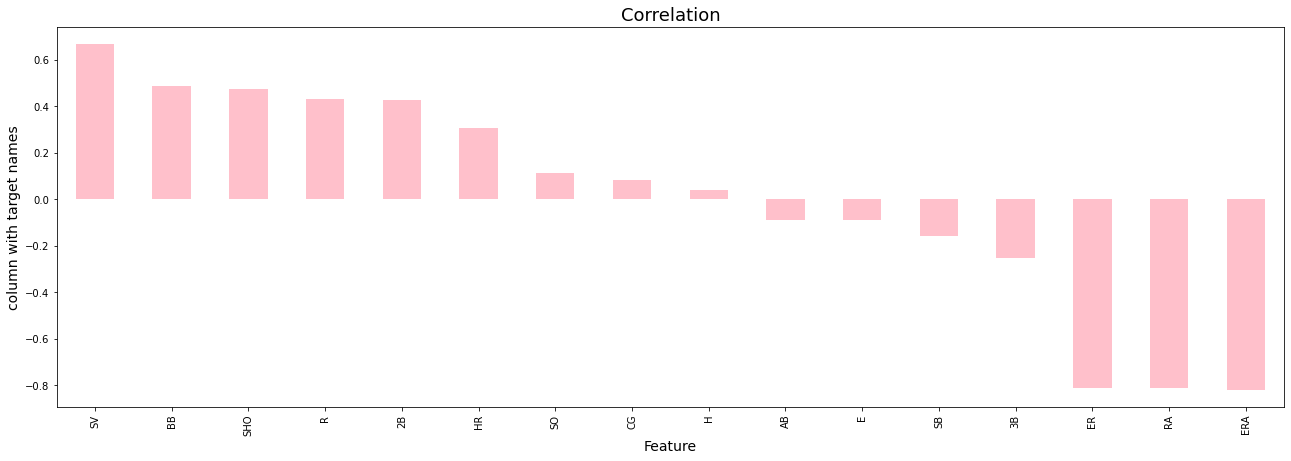

In [18]:
plt.figure(figsize=(22,7))
data.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='pink')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("column with target names",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

# Distribution of data : Skewness

In [19]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [20]:
columns=['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']

In [21]:
data.shape

(30, 17)

In [22]:
ncol=17
nrows=10

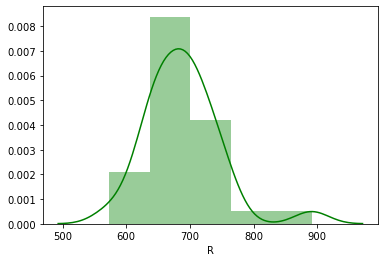

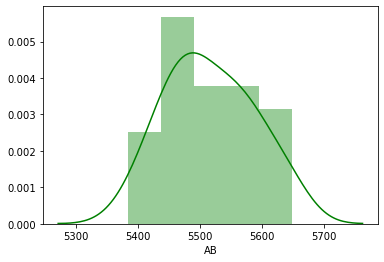

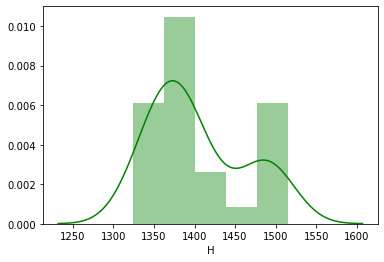

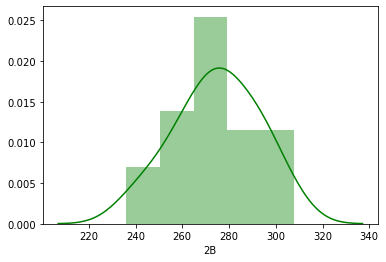

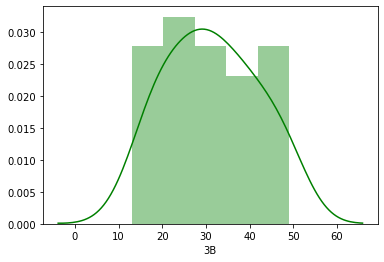

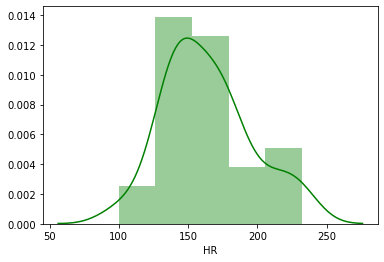

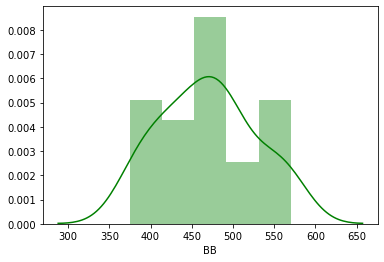

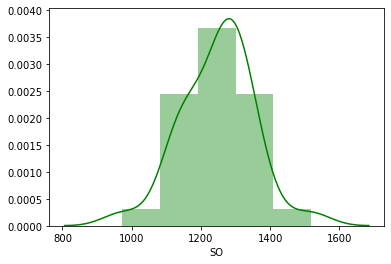

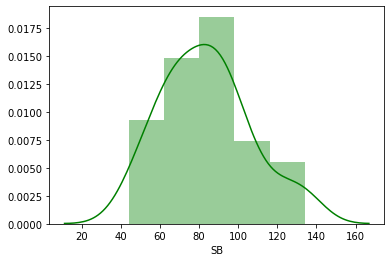

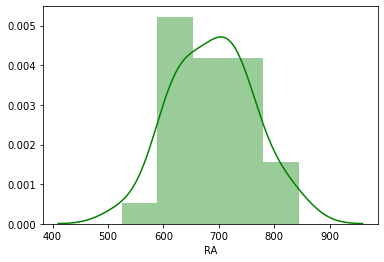

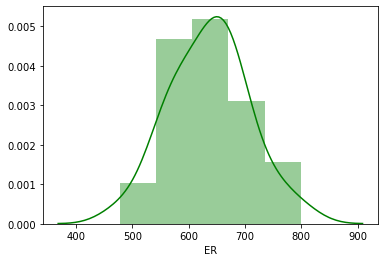

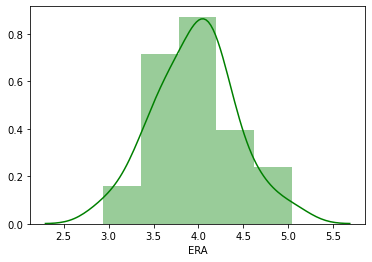

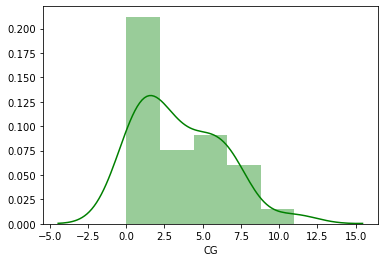

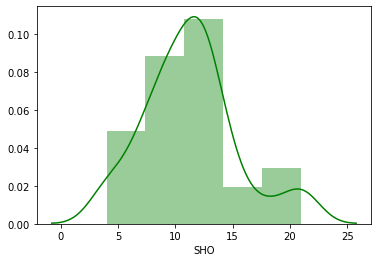

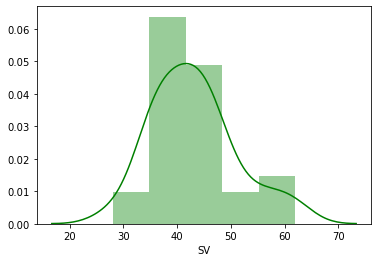

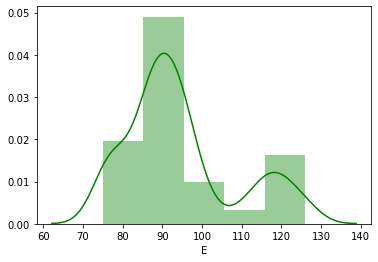

In [23]:
def dtp(a):
    plt.figure()
    sns.distplot(data[columns[a]],color='green',bins=5)
    
for i in range(0,16):
    dtp(i)

The columns look almost normally distributed overall

Observation: -
    The feature columns are almost normally distributed . There is a marginal level skewness H,CG,SV,E.SHO

# Detecting Outliers

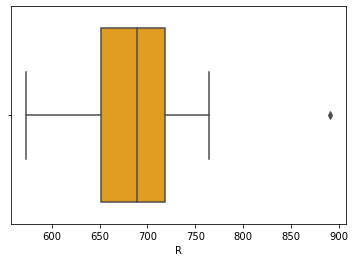

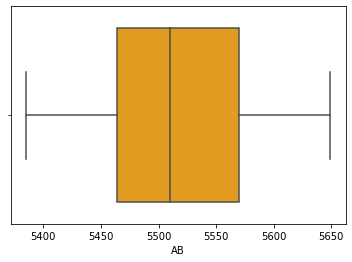

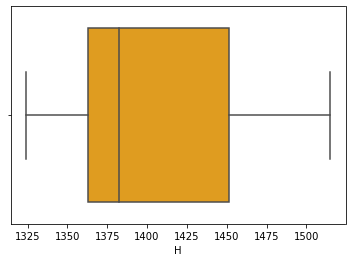

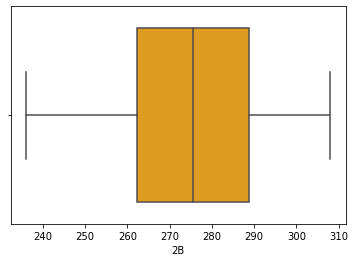

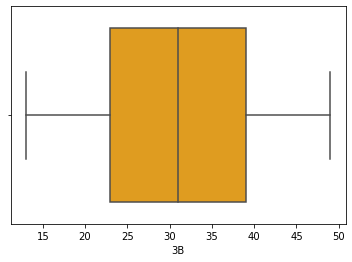

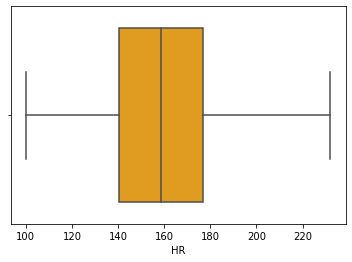

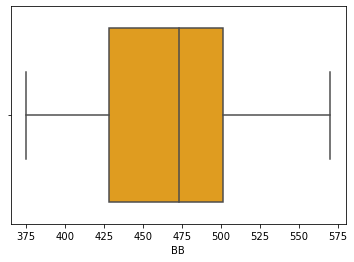

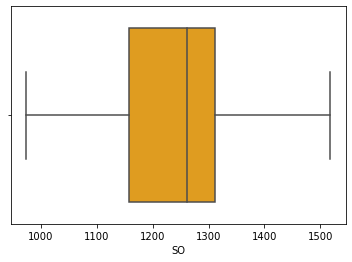

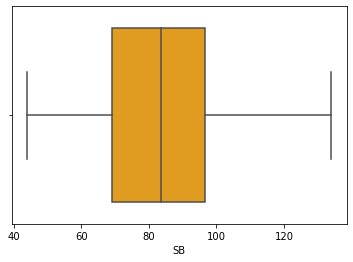

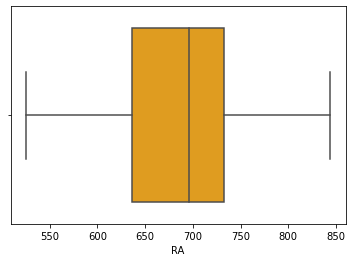

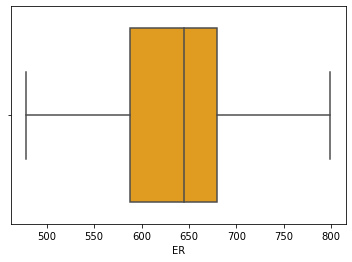

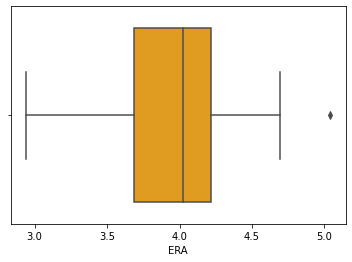

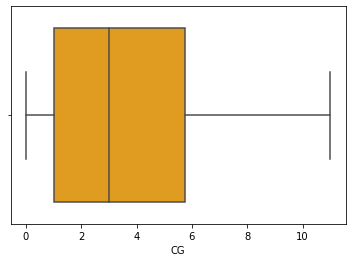

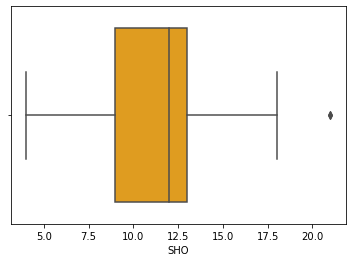

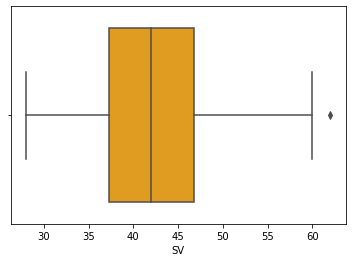

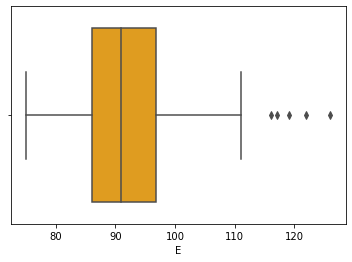

In [24]:
def bxplt(a):
    plt.figure()
    sns.boxplot(data[columns[a]],color='orange')
    
for i in range(0,16):
    bxplt(i)

observation : - 
    1) we can see small outliers in 'R','ERA','SHO','SV','E'
    2)  All other feature columns are without outliers 

# Checking distribution relationship

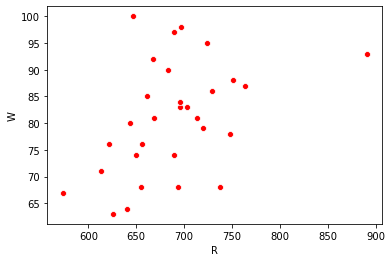

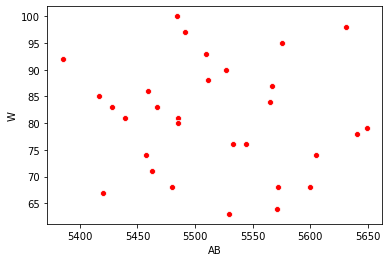

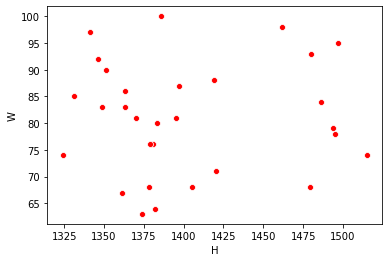

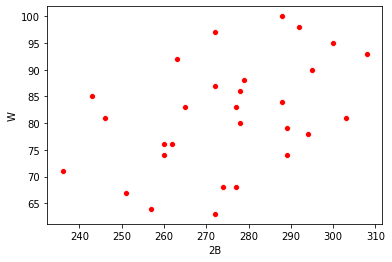

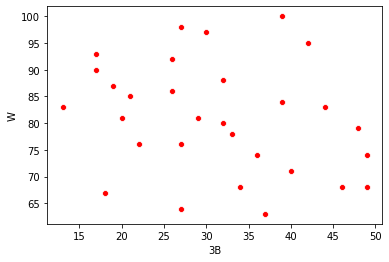

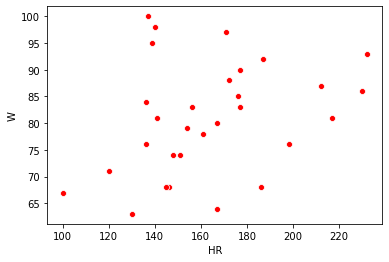

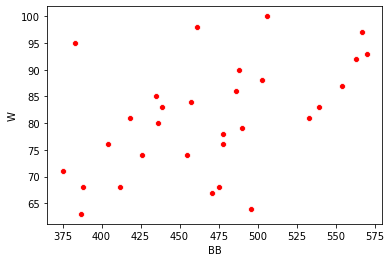

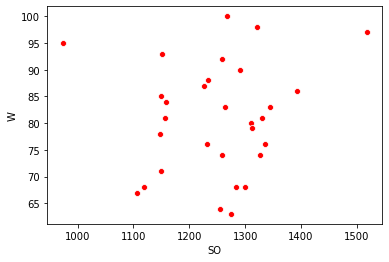

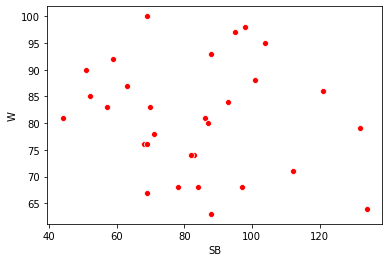

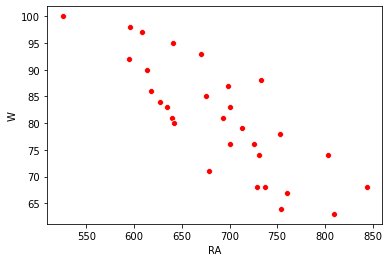

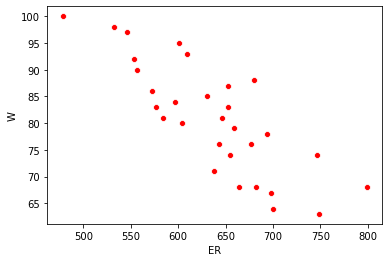

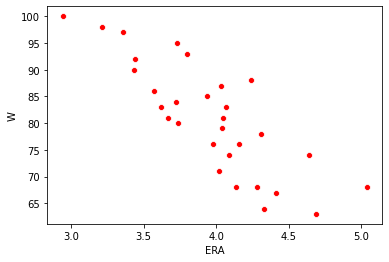

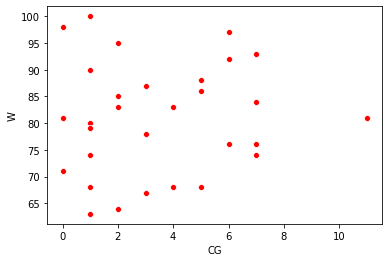

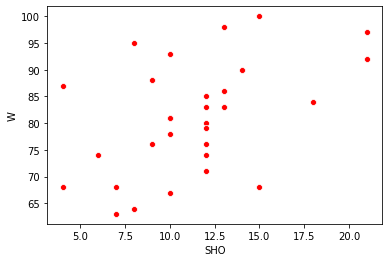

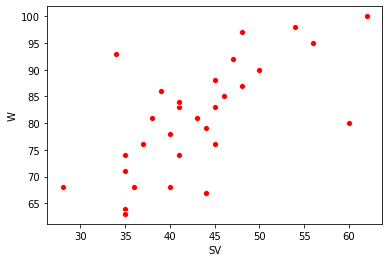

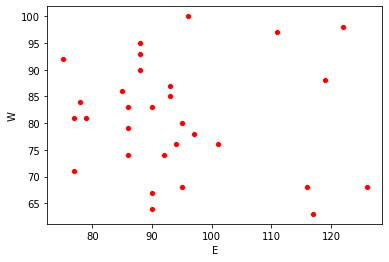

In [25]:
#relationship for each feature name with the output

def dtp(a):
    plt.figure()
    sns.scatterplot(x=data[columns[a]],y=data['W'],color='red')
    
for i in range(0,16):
    dtp(i)

Observation : -ER,RA,ERA are highly negatively correlated with wins

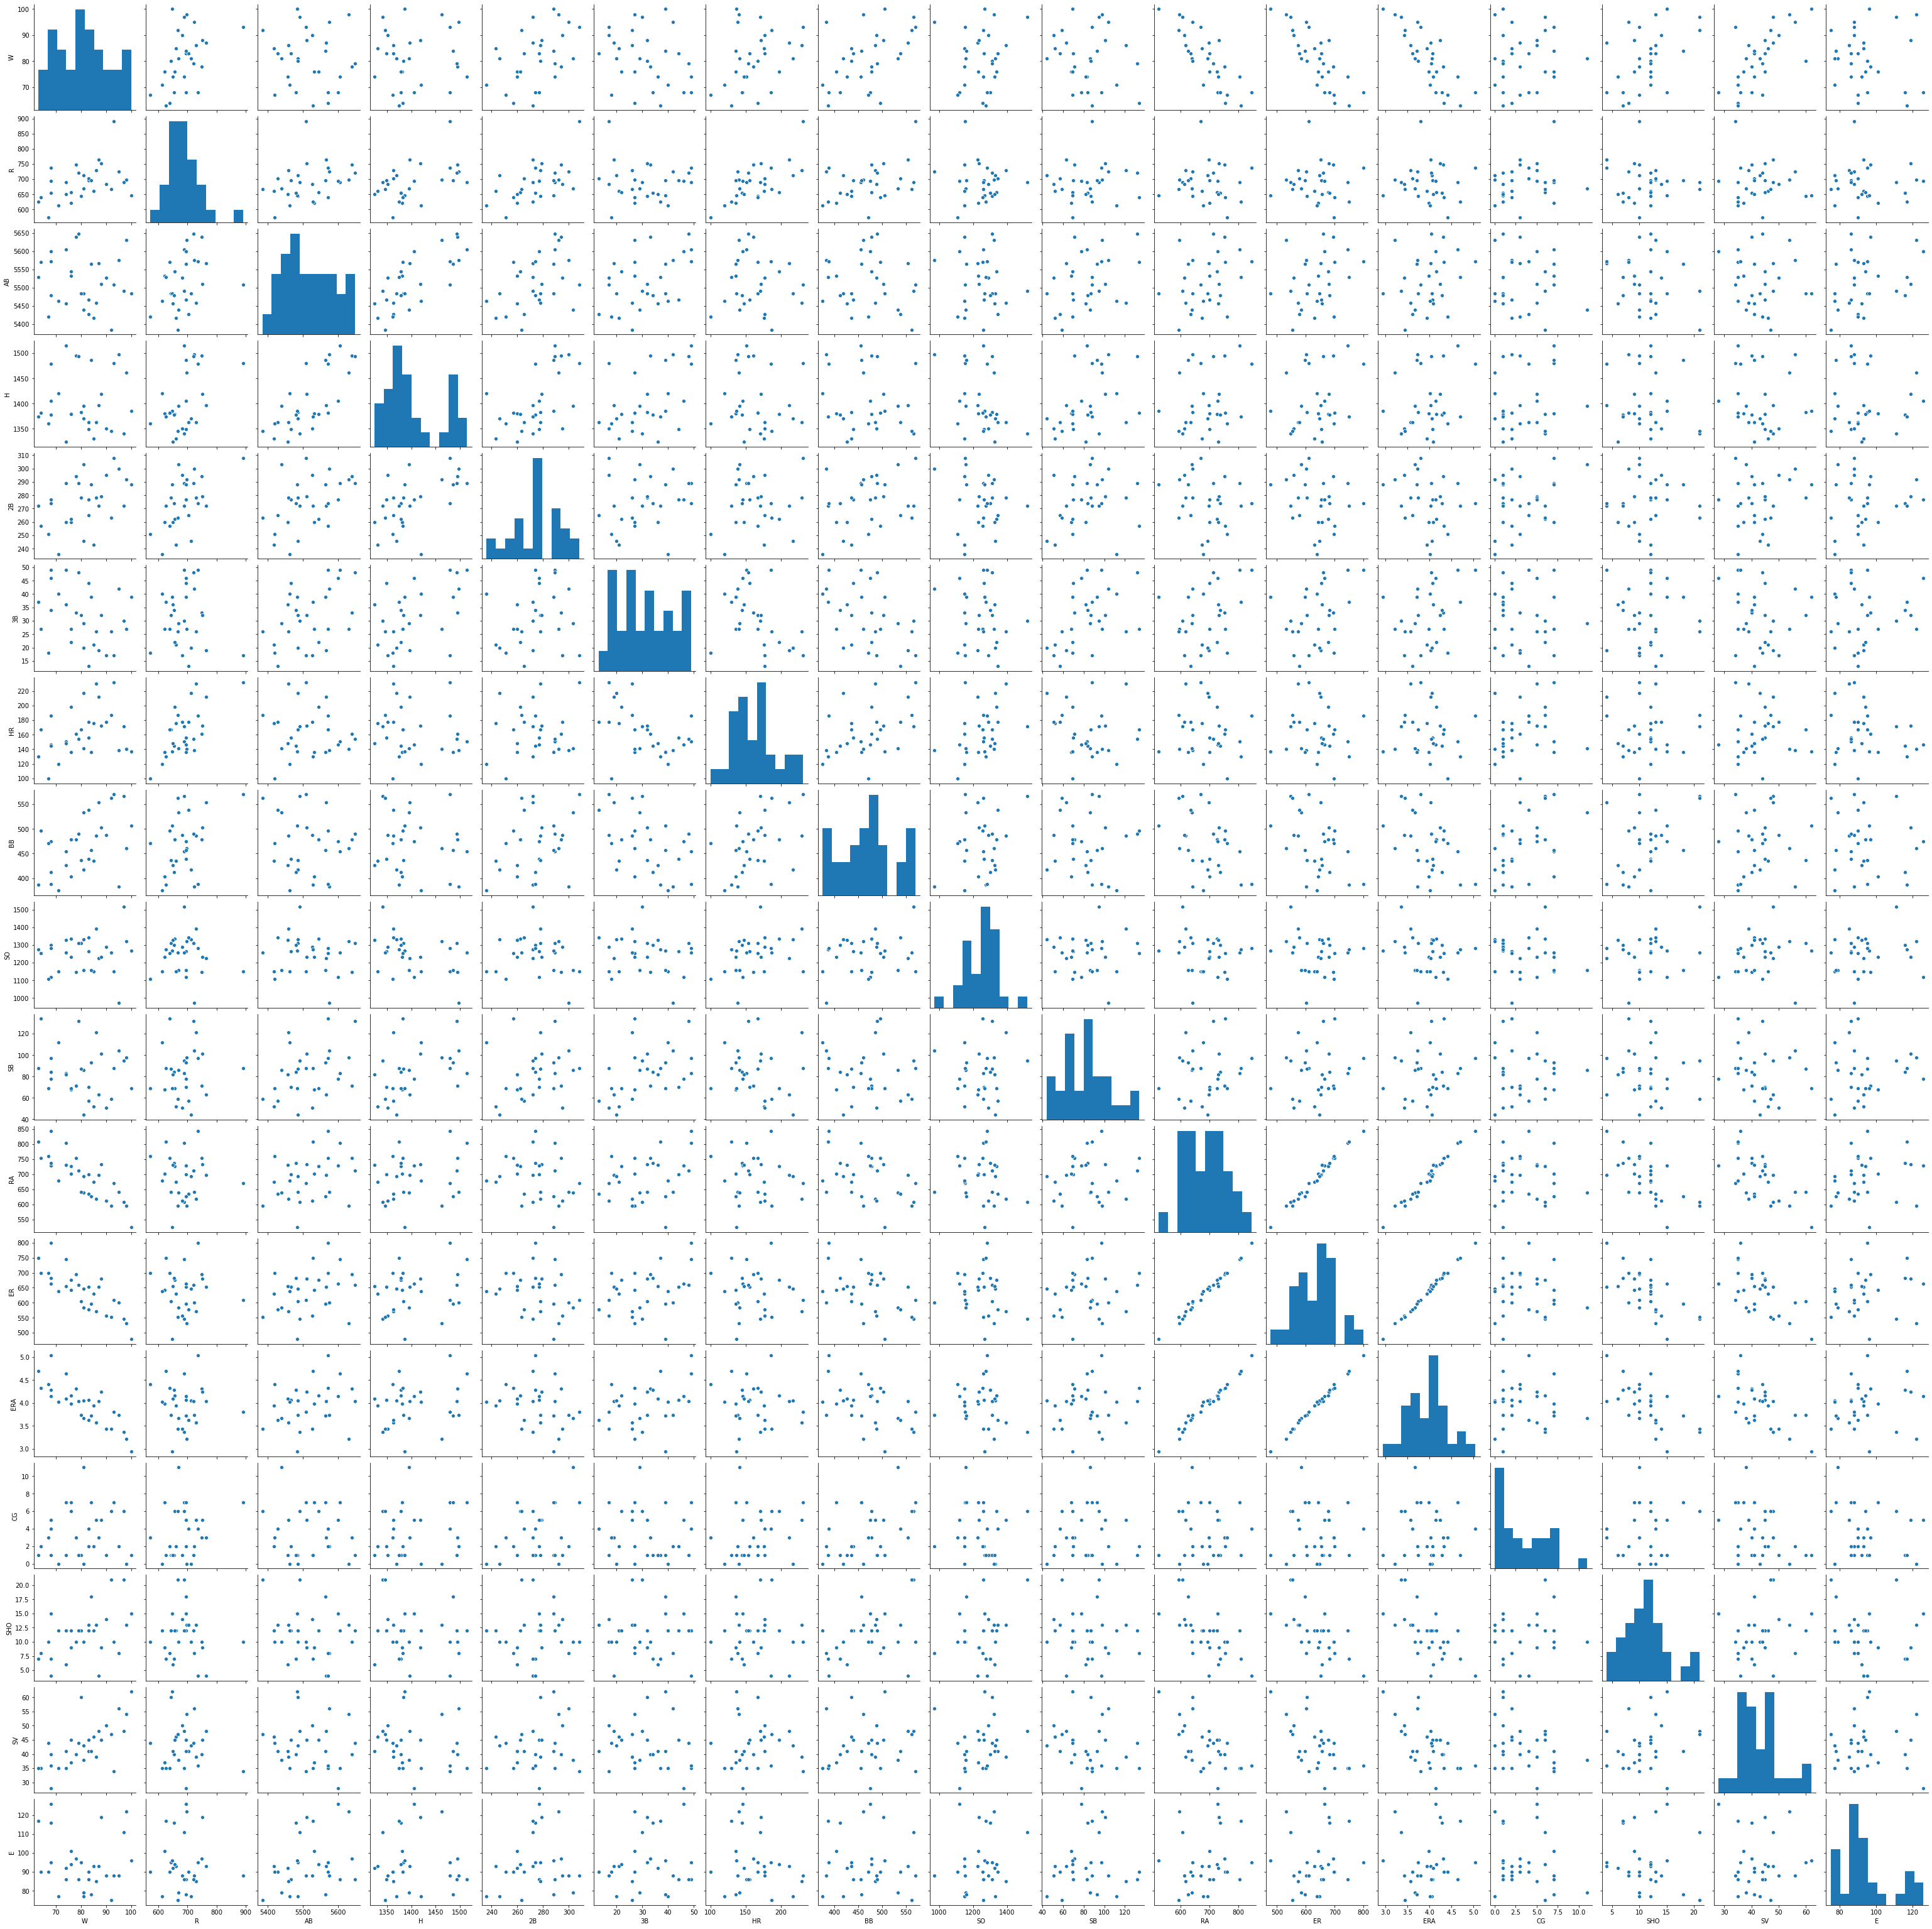

In [26]:
sns.pairplot(data)

No columns dropped as of now. we will drop further if necessary after checking multicollinearity

In [27]:
#data cleaning and data analysis done

# Removing outliers

In [28]:
#zscore

from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [29]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [30]:
z[5][1]

3.5096470447193067

There is only one outlier which need to be removed comes in range above a score 3

In [31]:
df_new=data[(z<3).all(axis=1)]

In [32]:
data.shape

(30, 17)

In [33]:
df_new.shape

(29, 17)

In [34]:
#1 row removed 

In [35]:
outliers_removed= 1

In [36]:
Percentageloss= outliers_removed/30*100

In [37]:
Percentageloss

3.3333333333333335

The loss 3.33% is acceptable

In [38]:
data=df_new.copy()

In [39]:
data.shape

(29, 17)

The outlier removal process is done successfully

# Skewness Removal

In [40]:
#initialising x and y

x=data.drop('W',axis=1)
y=data['W']

In [41]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

The skewness are seen in H,CG,SHO,SV,E which can be corrected

In [42]:
from sklearn.preprocessing import PowerTransformer
x['H']=PowerTransformer().fit_transform(x['H'].values.reshape(-1,1))
x['CG']=PowerTransformer().fit_transform(x['CG'].values.reshape(-1,1))
x['SV']=PowerTransformer().fit_transform(x['SV'].values.reshape(-1,1))
x['E']=PowerTransformer().fit_transform(x['E'].values.reshape(-1,1))

In [43]:
x.skew()

R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.526943
SV    -0.000925
E      0.065585
dtype: float64

In [44]:
x.isnull().sum()

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

The skewness is removed from the dataset successfully

# Multicollinearity check

In [45]:
m=data.drop('W',axis=1)

In [46]:
SC=StandardScaler()
X=SC.fit_transform(m)

In [47]:
X

array([[ 0.95939835,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.50148589, -0.81326172,  1.64315663,
        -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.50148589,  0.15929869,  0.21100645,
        -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  2.85461197, -0.32698152, -0.70036184,
        -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.36301292, -0.57012162, -0.83055731,
         0.46365315],
       [ 0.17408438,  1.25589393,  2

In [48]:
#checking multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=m.columns

In [49]:
vif.round(1)

,vif,features
0,7.2,R
1,18.3,AB
2,10.6,H
3,3.7,2B
4,3.3,3B
5,8.4,HR
6,3.4,BB
7,2.7,SO
8,2.1,SB
9,197.3,RA


The multicollinearity present among colums. Apart from R,2B,3B,BB,SO,SB,CG,SHO,E . All the columns are multicorrelated. SV,R,HR,H,AB,RA,ER,ERA are multicorrelated. This has to be removed for better model building

In [50]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,0.0,300,42,139,383,973,104,641,601,3.73,-0.307098,8,1.532753,-0.348265
1,696,5467,0.0,277,44,156,439,1264,70,700,653,4.07,-0.307098,12,0.312020,-0.540820
2,669,5439,0.0,303,29,141,533,1157,86,640,584,3.67,2.011315,10,-0.664137,-1.326125
3,622,5533,0.0,260,27,136,404,1231,68,701,643,3.98,1.264463,9,-0.820689,0.650818
4,689,5605,0.0,289,49,151,455,1259,83,803,746,4.64,1.264463,12,-1.149165,-0.540820


In [51]:
x.drop('R',axis=1,inplace=True)  #dropping R as SV and R are multicorrelated

In [52]:
x.drop('H',axis=1,inplace=True)  #dropping H as HR and H are multicorrelated

In [53]:
x.drop('RA',axis=1,inplace=True)  #dropping RA as AB and RA are multicorrelated.RA is correlated with many columns

In [54]:
x.drop('ER',axis=1,inplace=True)  #dropping ER as ER and ERA are multicorrelated

4 COLUMNS ARE DROPPED DUE TO MULTICOLLINEARITY

In [55]:
#checking multicollinearity after dropping multicollinear columns
m=x.copy()
SC=StandardScaler()
X=SC.fit_transform(m)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=m.columns


In [56]:
vif.round(1)

,vif,features
0,2.3,AB
1,2.9,2B
2,2.8,3B
3,2.0,HR
4,2.6,BB
5,1.9,SO
6,1.6,SB
7,4.4,ERA
8,2.3,CG
9,3.1,SHO


The values are below 5. Therefore multicollinearity is removed

No multicollinearity now. Removed all the multicollinear columns. Now we can fit the datas to model and check score

-----------------------------------------------------END OF EDA----------------------------------------------------------------------------------------------------

# Model Building

In [57]:
#x,y already initialized
x.head()

,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,5575,300,42,139,383,973,104,3.73,-0.307098,8,1.532753,-0.348265
1,5467,277,44,156,439,1264,70,4.07,-0.307098,12,0.312020,-0.540820
2,5439,303,29,141,533,1157,86,3.67,2.011315,10,-0.664137,-1.326125
3,5533,260,27,136,404,1231,68,3.98,1.264463,9,-0.820689,0.650818
4,5605,289,49,151,455,1259,83,4.64,1.264463,12,-1.149165,-0.540820


In [58]:
X=SC.fit_transform(x)

In [59]:
x=pd.DataFrame(X,columns=x.columns)

In [60]:
x.head()

,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.307098,-0.813262,1.532753,-0.348265
1,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,-0.307098,0.159299,0.312020,-0.540820
2,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,2.011315,-0.326982,-0.664137,-1.326125
3,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,1.264463,-0.570122,-0.820689,0.650818
4,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,1.264463,0.159299,-1.149165,-0.540820


In [61]:
x.shape

(29, 12)

In [62]:
y.shape

(29,)

In [63]:
#finding best random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.9526336981726454  on random_state  1


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=1)

In [65]:
#shapes of x and y (train,test)
x_train.shape

(19, 12)

In [66]:
x_test.shape

(10, 12)

In [67]:
y_train.shape

(19,)

In [68]:
y_test.shape

(10,)

In [69]:
# different algorithm going to use
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,LassoCV


lr=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
adr=AdaBoostRegressor()
gdr=GradientBoostingRegressor()
ri=Ridge(alpha=1)
la=Lasso(alpha=1)

In [70]:
#code for Training and Prediction 

def eval(x):
    mod=x
    print(mod)
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    
    print("r2_score(predicted_train) is ",r2_score(y_train,mod.predict(x_train)))
    print("\n")
    print("r2_score is :",r2_score(y_test,pred))
    print("\n")
    print("Score of trained data :",mod.score(x_train,y_train))
    print("\n")
    print("Score of test data :",mod.score(x_test,y_test))
    print("\n")
    print("Error")
    print("mean absolute error : ",mean_absolute_error(y_test,pred))
    print("mean squared error : ",mean_squared_error(y_test,pred))

we can call each model to train and test data

In [71]:
eval(lr)

LinearRegression()
r2_score(predicted_train) is  0.8022693774333559


r2_score is : 0.9526336981726454


Score of trained data : 0.8022693774333559


Score of test data : 0.9526336981726454


Error
mean absolute error :  1.9044113940778715
mean squared error :  6.377398878035021


The linear regression model hass training of 80% and prediction with an accuracy of 95.26%

In [72]:
eval(dtr)

DecisionTreeRegressor()
r2_score(predicted_train) is  1.0


r2_score is : 0.44518716577540096


Score of trained data : 1.0


Score of test data : 0.44518716577540096


Error
mean absolute error :  7.3
mean squared error :  74.7


Decision Tree regressor tends to be overfitting model with accuracy of 44.51% while training accuracy is showing as `100%. This doesn't work effiecient in new dataset

In [73]:
eval(rfr)

RandomForestRegressor()
r2_score(predicted_train) is  0.9274013370565045


r2_score is : 0.6545032679738563


Score of trained data : 0.9274013370565045


Score of test data : 0.6545032679738563


Error
mean absolute error :  5.406000000000001
mean squared error :  46.51768


random forest regressor has an accuracy of 65.45%. This seems to be overfitted

In [74]:
eval(adr)

AdaBoostRegressor()
r2_score(predicted_train) is  0.9896601328661119


r2_score is : 0.6968244195861274


Score of trained data : 0.9896601328661119


Score of test data : 0.6968244195861274


Error
mean absolute error :  5.182121212121213
mean squared error :  40.8195601469238


Adaboost regressor shows an accuracy of 69.68% (looks overfitting)

In [75]:
eval(gdr)

GradientBoostingRegressor()
r2_score(predicted_train) is  0.9999999587847648


r2_score is : 0.6586568372851656


Score of trained data : 0.9999999587847648


Score of test data : 0.6586568372851656


Error
mean absolute error :  5.774423981765382
mean squared error :  45.958443427925296


GRADIENT BOOSTING regressor shows an accuracy of 65.86%

# It is inferred that Linear Regression tends to be the best model with an accuracy score of 95.26%. We can check with Cross Valdiation which has low mean_Absolute_error scoring consider to be the best model

# Cross Validation 

In [76]:
#since it is Regression problem we can cross check with its mean absolute error which has lowest error

from numpy import absolute

model=[lr,dtr,rfr,adr,gdr]

for m in model:
    score=cross_val_score(m,x,y,scoring='neg_mean_absolute_error',cv=5)
    print(m,"Cross val score is ",score)
    score=absolute(score)
    print("mean is ",score.mean())

LinearRegression() Cross val score is  [-3.10700448 -4.98246561 -8.49111147 -2.5925256  -1.61318909]
mean is  4.157259249711158
DecisionTreeRegressor() Cross val score is  [-9.66666667 -9.16666667 -8.         -6.83333333 -4.2       ]
mean is  7.573333333333333
RandomForestRegressor() Cross val score is  [ -4.65166667  -7.58833333 -10.25333333  -7.04        -1.572     ]
mean is  6.221066666666667
AdaBoostRegressor() Cross val score is  [-5.26944444 -7.18472222 -9.11212121 -6.39861111 -2.56512821]
mean is  6.10600543900544
GradientBoostingRegressor() Cross val score is  [-6.46352048 -9.0773257  -9.08631062 -5.8022597  -2.33537887]
mean is  6.552959073296051


LinearRegression Model has the least mean_absolute error such that LinearRegression algorithm fits best for the model

# Linear Regression is considered to be the best model with 95.26%

But Linear regression has test accuracy higher than the trained accuracy. Therefore, Now we can do hypertuning. But vanila Linear Regression doesn't have any hyper parameters. we will try Regularization techniques and check whether it gives good accuracy than normal linear Regression as well as will select proper model if available.

# HYPER TUNING 

In [77]:
#Ridge Regression
eval(ri)

Ridge(alpha=1)
r2_score(predicted_train) is  0.7944962503449944


r2_score is : 0.8864778432988375


Score of trained data : 0.7944962503449944


Score of test data : 0.8864778432988375


Error
mean absolute error :  2.2498854180152152
mean squared error :  15.284623178244516


In [78]:
#lasso Regression
eval(la)

Lasso(alpha=1)
r2_score(predicted_train) is  0.7260766893866484


r2_score is : 0.7466035295887468


Score of trained data : 0.7260766893866484


Score of test data : 0.7466035295887468


Error
mean absolute error :  4.303558649474752
mean squared error :  34.11730077617114


Hypertuning and finding alpha value

In [79]:
#finding best alpha value using hypertuning method - GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(ri, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

results = search.fit(x, y)

In [80]:
results.best_score_

-4.649916631654552

In [81]:
results.best_params_

{'alpha': 0.99}

#alpha value is 0.99

In [82]:
ridgemodel=Ridge(alpha=0.99)

In [83]:
eval(ridgemodel)

Ridge(alpha=0.99)
r2_score(predicted_train) is  0.794578449443859


r2_score is : 0.8870905826266284


Score of trained data : 0.794578449443859


Score of test data : 0.8870905826266284


Error
mean absolute error :  2.2451462064348617
mean squared error :  15.20212395515075


In [84]:
ridgemodel.score(x_test,y_test)

0.8870905826266284

The ridge regression give 88.70% model accuracy. But again here training score is less than testing score

Regularization

In [85]:
#Lasso Regularization

lasscv=LassoCV(alphas=None,cv=10,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)


LassoCV(cv=10, normalize=True)

In [86]:
alpha=lasscv.alpha_

In [87]:
alpha

0.43774892672911736

The alpha value for lasso regression is 0.4377

In [88]:
lassomodel=Lasso(alpha)

In [89]:
eval(lassomodel)

Lasso(alpha=0.43774892672911736)
r2_score(predicted_train) is  0.771328465760888


r2_score is : 0.7698085470586745


Score of trained data : 0.771328465760888


Score of test data : 0.7698085470586745


Error
mean absolute error :  3.6323687750550193
mean squared error :  30.99297722402006


In [90]:
lassomodel.score(x_train,y_train)

0.771328465760888

In [91]:
lassomodel.score(x_test,y_test)

0.7698085470586745

It is not a overfitted/underfitted model

After hyper tuning and Regualrization. It is found that Eventhough the linear Regression model is giving us high percentage (95%) of accuracy in prediction phase, It is showing low accuracy (80%) in Training phase as compared to testing phase where there is possibility of overfitting. Therfore we hypertuned and applied regularization through which we got lasso regression model which gave training accuarcy of 77.13% and prediction accuracy of 76.98%. Thus we select Lasso Regualrized regression for the prediction of baseball wins.

# The Lasso regularization model is selected to be the best model with 76.98% accuracy

The accuracy can be increased in future if we have more availability of data and features if available in this dataset

# Conclusion

In [92]:
joblib.dump(lassomodel,"lassreg_baseballwins_prediction.obj")

['lassreg_baseballwins_prediction.obj']

In [93]:
#Lets Check loading the file 

BBwins_prediction=joblib.load("lassreg_baseballwins_prediction.obj")

In [94]:
BBwins_prediction.score(x_test,y_test)

0.7698085470586745

In [95]:
pred=lassomodel.predict(x_test)
Conclusion=pd.DataFrame([BBwins_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [96]:
Conclusion

,0,1,2,3,4,5,6,7,8,9
Predicted,99.991243,73.680929,74.240036,84.49097,83.942761,90.340549,75.880604,81.814744,67.722034,79.478522
Original,99.991243,73.680929,74.240036,84.49097,83.942761,90.340549,75.880604,81.814744,67.722034,79.478522


we can see it is giving exact data as result. The model is working well

The datas predicted are perfectly matching. The jobfile created is working well almost giving good accuracy.

After Training and Testing six algorithm model. The best accuracy model was determined as Lasso Linear Regression (hypertuned/Regularized model) with 77% true accuracy after all the data cleaning, pre-processing, training and prediction as well as evaluation phase.

Basketball Wins can be easily predicted now through this model

# Model Created Succesfully
